#### Use Holdout predictions to create some plots

- figure out where correct/wrong predictions are 
- explore which types of images are correct/wrong-ly classified... show some examples



- Ref: http://localhost:8888/notebooks/explore_imagesNgeojson_v1.ipynb

#### General REQs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [2]:
# !pwd
# path='/Users/####/'
# path = '/home/ubuntu/pynb/####/'

### Load Holdout predictions

In [3]:
HOpreds = pd.read_csv('./building_set/XY_holdout_update.csv', index_col=0)

In [47]:
HOpreds.shape

(4400, 11)

In [ ]:
HOpreds.head() #NOTE#**not the same filenamepaths... on diff machines...

In [5]:
def getFilepath(filename):
    # filepath = '/'.join(HOpreds.filename[0].split('/')[5:])
    return '/'.join(filename.split('/')[5:])

In [6]:
def getFileID(filename):
    # fileID = HOpreds.filename[0].split('/')[-1][:-4]
    return filename.split('/')[-1][:-4]

In [7]:
HOpreds['filepath'] = HOpreds.filename.apply(lambda x: getFilepath(x))

In [42]:
HOpreds['feature_id'] = HOpreds.filename.apply(lambda x: int(getFileID(x)))

In [ ]:
HOpreds.head()

### Load geojson info

In [10]:
import geopandas as gpd

df_b = gpd.read_file(path+'/building_set/buildings/'+'buildings.geojson')
df_nb = gpd.read_file(path+'building_set/no_buildings/'+'no-buildings.geojson')


In [11]:
df_b.crs, df_nb.crs

({'init': 'epsg:4326'}, {'init': 'epsg:4326'})

In [12]:
df_b['x'] = df_b.geometry.geometry.centroid.apply(lambda p: p.x)
df_b['y'] = df_b.geometry.geometry.centroid.apply(lambda p: p.y)
df_b['xy'] = df_b.geometry.geometry.centroid.apply(lambda p: [p.x,p.y])


df_nb['x'] = df_nb.geometry.geometry.centroid.apply(lambda p: p.x)
df_nb['y'] = df_nb.geometry.geometry.centroid.apply(lambda p: p.y)
df_nb['xy'] = df_nb.geometry.geometry.centroid.apply(lambda p: [p.x,p.y])

In [ ]:
## plot all image locations with matplotlib
ax = plt.figure(figsize=(15, 15)).add_subplot(111)

plt.scatter(df_nb.x,df_nb.y, alpha=0.25, c='lightgray', marker='s', s=120, edgecolors='gray')
plt.scatter(df_b.x,df_b.y, alpha=0.25, c='orange', marker='s', s=120, edgecolors='r')

plt.legend(('no_buildings','buildings'),loc='center left', fontsize='x-large')
plt.title('Centroid Coordinates of ALL Images',fontsize=18, fontweight='bold')
plt.ylabel('Latitude˚',fontsize=18)
plt.xlabel('Longitude˚',fontsize=18)

In [13]:
df_joined = gpd.pd.concat([df_b,df_nb]).reset_index()

In [450]:
df_joined.to_csv('./building_set/combined_geojsonInfo.csv')

In [14]:
df_joined.head()

,index,class_name,feature_id,geometry,x,y,xy
0,0,Buildings,298021,"POLYGON ((14.20433772170354 12.36790308324247,...",14.204910,12.368465,"[14.204909841113661, 12.368464982853263]"
1,1,Buildings,624999,"POLYGON ((13.57843908703417 11.33400779938784,...",13.579011,11.334570,"[13.57901120644429, 11.334569698998633]"
2,2,Buildings,297460,"POLYGON ((13.95718213653246 11.35873138226263,...",13.957754,11.359293,"[13.957754255942577, 11.359293281873416]"
3,3,Buildings,57828,"POLYGON ((13.69629568551853 11.5149394740624, ...",13.696868,11.515501,"[13.696867804928653, 11.515501373673192]"
4,4,Buildings,162112,"POLYGON ((14.28100172265939 11.33288400016626,...",14.281574,11.333446,"[14.281573842069509, 11.33344589977705]"


In [15]:
df_joined.columns

Index(['index', 'class_name', 'feature_id', 'geometry', 'x', 'y', 'xy'], dtype='object')

In [46]:
len(df_joined)

22000

### Find intersection of FileIDs : feature_id

In [58]:
HOid = set(HOpreds.feature_id.values.tolist())
# HOid
ALLid = set(df_joined.feature_id.values.tolist())
# allid

SameID = ALLid.intersection(HOid)
len(SameID)

4400

In [69]:
df_same = df_joined[df_joined.feature_id.apply(lambda x: (x in list(SameID)))]#.sum()

In [79]:
print(len(df_same))

df_same.head() 

4400


,index,class_name,feature_id,geometry,x,y,xy
0,0,Buildings,298021,"POLYGON ((14.20433772170354 12.36790308324247,...",14.204910,12.368465,"[14.204909841113661, 12.368464982853263]"
1,1,Buildings,624999,"POLYGON ((13.57843908703417 11.33400779938784,...",13.579011,11.334570,"[13.57901120644429, 11.334569698998633]"
4,4,Buildings,162112,"POLYGON ((14.28100172265939 11.33288400016626,...",14.281574,11.333446,"[14.281573842069509, 11.33344589977705]"
10,10,Buildings,23410,"POLYGON ((14.26498237917608 12.29148473617496,...",14.265554,12.292047,"[14.265554498586196, 12.292046635785747]"
25,25,Buildings,781835,"POLYGON ((14.41831038108777 11.88466941796259,...",14.418883,11.885231,"[14.41888250049789, 11.885231317573382]"


### Merge data on feature_id

In [80]:
df_HOpredtmp = HOpreds.merge(df_same, on='feature_id')

In [81]:
df_HOpredtmp.columns

Index(['Oidx', 'filename', 'Blabel', 'augment', 'YHoldPredProb_nb',
       'YHoldPredProb_b', 'YHold_test', 'YHold_predict', 'predict_diff',
       'filepath', 'feature_id', 'index', 'class_name', 'geometry', 'x', 'y',
       'xy'],
      dtype='object')

In [82]:
df_HOpred = df_HOpredtmp[['filepath', 'feature_id','class_name',
                       'Blabel', 'augment', 'YHoldPredProb_nb','YHoldPredProb_b', 
                       'YHold_test', 'YHold_predict', 'predict_diff',
                       'geometry', 'x', 'y','xy']]

In [ ]:
df_HOpred

In [451]:
df_HOpred.to_csv('./building_set/HoldoutPredict_CombinedGeoInfo.csv')

In [84]:
## convert pd-->GEOpd ?
Gdf_HOpred = gpd.GeoDataFrame(df_HOpred)

### Plot holdout classification outcomes

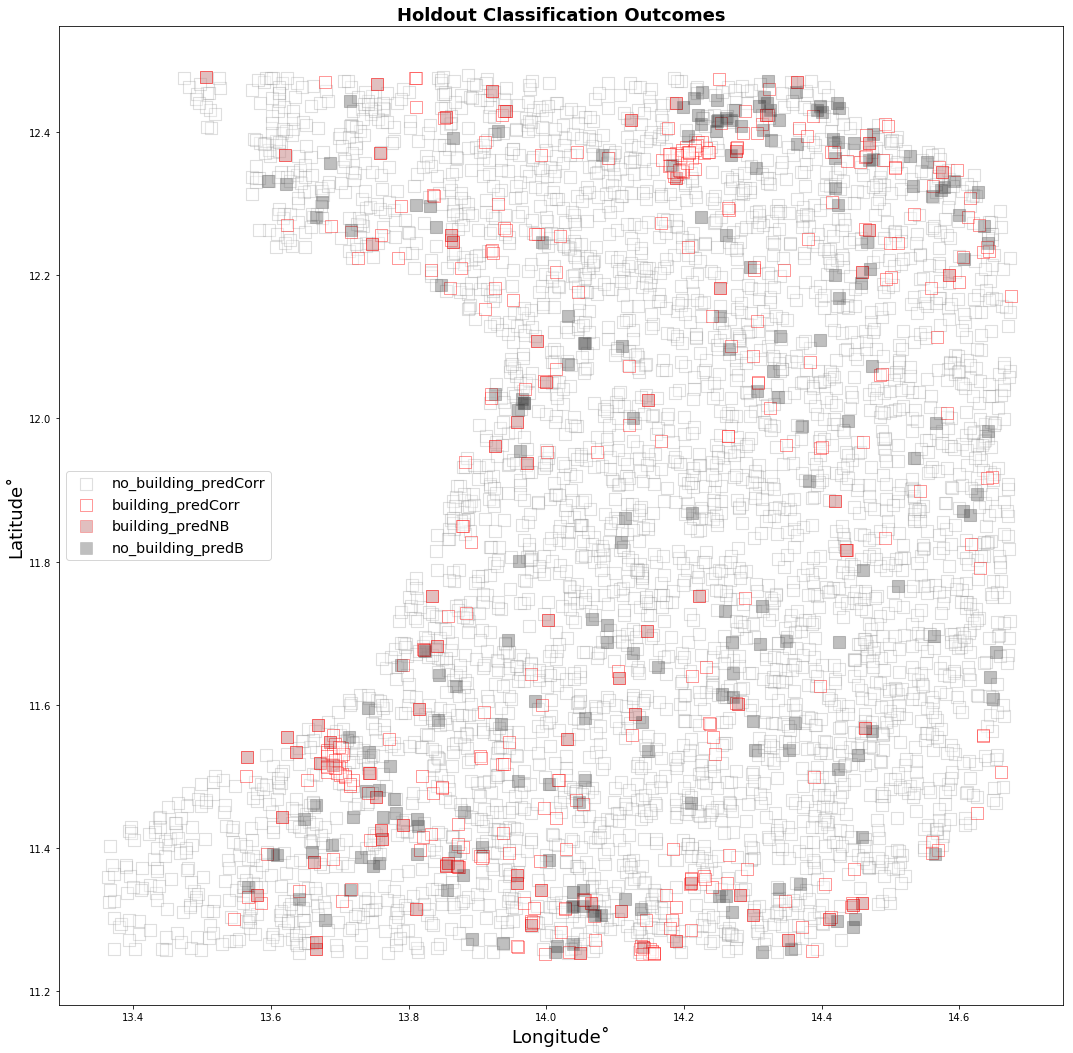

In [453]:
ax = plt.figure(figsize=(18, 18)).add_subplot(111) #, facecolor='darkgray')

## reverse zip (today's discovery!!)
Bx, By = zip(*Gdf_HOpred[Gdf_HOpred.Blabel==1].xy)
NBx, NBy = zip(*Gdf_HOpred[Gdf_HOpred.Blabel==0].xy)

s1 = plt.scatter(NBx, NBy, alpha=0.25, c='white', marker='s', s=150, edgecolors='gray', linewidths=1.125) #-1 : black

s2 = plt.scatter(Bx, By, alpha=0.4, c='white', marker='s', s=150, edgecolors='r')  # 1 : red


B_pNB_x, B_pNB_y = zip(*Gdf_HOpred[Gdf_HOpred.predict_diff==1].xy)
s3 = plt.scatter(B_pNB_x, B_pNB_y, alpha=0.25, c='darkred', marker='s', s=150, edgecolors='r') 


NB_pB_x, NB_pB_y = zip(*Gdf_HOpred[Gdf_HOpred.predict_diff==-1].xy)
s4 = plt.scatter(NB_pB_x, NB_pB_y, alpha=0.25, c='k', marker='s', s=150, edgecolors='gray') 

plt.legend((s1, s2, s3, s4), 
           ('no_building_predCorr', 'building_predCorr', 'building_predNB', 'no_building_predB'),
           loc='center left', fontsize='x-large')

plt.title('Holdout Classification Outcomes',fontsize=18, fontweight='bold')
plt.ylabel('Latitude˚',fontsize=18)
plt.xlabel('Longitude˚',fontsize=18)

In [179]:
# TOTAL WRONG | % Correct
df_HOpred.predict_diff.abs().sum() , (1 - df_HOpred.predict_diff.abs().sum()/4400 )

(290, 0.93409090909090908)

In [177]:
# B WRONG | % Correct
(df_HOpred.predict_diff==1).sum() , (1 - (df_HOpred.predict_diff==1).sum()/400 )

(79, 0.80249999999999999)

In [180]:
# NB WRONG | % Correct
(df_HOpred.predict_diff==-1).sum() , (1 - (df_HOpred.predict_diff==-1).sum()/4000 )

(211, 0.94725000000000004)

In [440]:
# df_HOpred

In [ ]:
### Explore/check average probablity difference for classification 
### --> groupby prediction outcome types: Corr | B_nb | NB_b

In [303]:
dftmp_HOpred = df_HOpred[['YHoldPredProb_nb','YHoldPredProb_b','predict_diff']].copy()

In [305]:
dftmp_HOpred['abs_PredProbDiff'] = dftmp_HOpred.iloc[:,[0,1]].diff(1,1).abs().iloc[:,1]
dftmp_HOpred.groupby(by=['predict_diff'])['abs_PredProbDiff'].mean().to_frame()


,abs_PredProbDiff
predict_diff,
-1,0.383533
0,0.802038
1,0.399315


In [443]:
dftmp_HOpred.groupby(by=['predict_diff'])['abs_PredProbDiff'].std().to_frame()

,abs_PredProbDiff
predict_diff,
-1,0.283358
0,0.230016
1,0.261955


### Define function(s) to transform image plot axes with actual geotiff info for plotting etc. ...

In [428]:
import gdal

def ImgTransform(gtif):
    arr = gtif.ReadAsArray()
    trans = gtif.GetGeoTransform() # ulx, xres, xskew, uly, yskew, yres
    extent = (trans[0], trans[0] + gtif.RasterXSize*trans[1],  
              trans[3] + gtif.RasterYSize*trans[5], trans[3])

    return arr, extent

def readGeotiff_getTransfExt4ImgTranpose(filename):
    #gtif1 = gdal.Open(path+'building_set/buildings/100208.tif')
    gtif = gdal.Open(filename)
    
    arr, extent = ImgTransform(gtif)
    
    return arr, extent

In [ ]:
## Test

# gtif = gdal.Open('./building_set/no_buildings/802133.tif')
# gtif.RasterXSize, gtif.RasterYSize, gtif.GetGeoTransform()
# (256,
#  250,
#  (14.30322086109835,
#   4.487879136029428e-06,
#   0.0,
#   12.350154203527113,
#   0.0,
#   -4.487879136029428e-06))

In [ ]:
## Test
a,e = readGeotiff_getTransfExt4ImgTranpose('./building_set/no_buildings/802133.tif') ## should be an aeroplane!

plt.imshow(a[:3,:,:].transpose((1, 2, 0)), extent=e)

## ** Explore which images make classification possible/difficult...

In [ ]:
import gdal

In [343]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


### B_pNB : e.g. Images with buildings predicted as having no_buildings: 

In [400]:
B_pNB_filepaths = Gdf_HOpred[df_HOpred.predict_diff==1].sort_values(by=['x','y']).sample(20).filepath.values.tolist()

In [402]:
# B_pNB_filepaths

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0, 20):
    plt.subplot(5,4, 1 + i)
    #plt.imshow(load_img(path+B_pNB_filepaths[i]))
    
    a,e = readGeotiff_getTransfExt4ImgTranpose(path+B_pNB_filepaths[i])
    plt.imshow(a[:3,:,:].transpose((1, 2, 0)), extent=e)
    

### NB_pB : e.g. Images with no_buildings predicted as having buildings: 

In [405]:
NB_pB_filepaths = Gdf_HOpred[df_HOpred.predict_diff==-1].sort_values(by=['x','y']).sample(20).filepath.values.tolist()

In [418]:
NB_pB_filepaths #'building_set/no_buildings/802133.tif' ##aeroplane! =D OMG!!!

['building_set/no_buildings/460412.tif',
 'building_set/no_buildings/802133.tif',
 'building_set/no_buildings/658154.tif',
 'building_set/no_buildings/209342.tif',
 'building_set/no_buildings/447283.tif',
 'building_set/no_buildings/37101.tif',
 'building_set/no_buildings/228589.tif',
 'building_set/no_buildings/421568.tif',
 'building_set/no_buildings/230426.tif',
 'building_set/no_buildings/788498.tif',
 'building_set/no_buildings/729648.tif',
 'building_set/no_buildings/592752.tif',
 'building_set/no_buildings/512776.tif',
 'building_set/no_buildings/766701.tif',
 'building_set/no_buildings/249483.tif',
 'building_set/no_buildings/280948.tif',
 'building_set/no_buildings/163081.tif',
 'building_set/no_buildings/51886.tif',
 'building_set/no_buildings/713958.tif',
 'building_set/no_buildings/472349.tif']

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0, 20):
    plt.subplot(5,4, 1 + i)
    #plt.imshow(load_img(path+NB_pB_filepaths[i]))
    
    a,e = readGeotiff_getTransfExt4ImgTranpose(path+NB_pB_filepaths[i])
    plt.imshow(a[:3,:,:].transpose((1, 2, 0)), extent=e)

### B_pB : e.g. Images with buildings predicted as having buildings: 

In [415]:
B_pB_filepaths = Gdf_HOpred[(df_HOpred.predict_diff==0)&(df_HOpred.Blabel==1)].sort_values(by=['x','y']).sample(20).filepath.values.tolist()

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0, 20):
    plt.subplot(5,4, 1 + i)
    #plt.imshow(load_img(path+B_pB_filepaths[i]))
    
    a,e = readGeotiff_getTransfExt4ImgTranpose(path+B_pB_filepaths[i])
    plt.imshow(a[:3,:,:].transpose((1, 2, 0)), extent=e)

### NB_pNB :  e.g. Images with no_buildings predicted as having no_buildings: 

In [412]:
NB_pNB_filepaths = Gdf_HOpred[(df_HOpred.predict_diff==0)&(df_HOpred.Blabel==0)].sort_values(by=['x','y']).sample(20).filepath.values.tolist()

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0, 20):
    plt.subplot(5,4, 1 + i)
    #plt.imshow(load_img(path+NB_pNB_filepaths[i]))
    
    a,e = readGeotiff_getTransfExt4ImgTranpose(path+NB_pNB_filepaths[i])
    plt.imshow(a[:3,:,:].transpose((1, 2, 0)), extent=e)